<p> 

A function to do pairs bootstrap:

As discussed in the video, pairs bootstrap involves resampling pairs of data. Each collection of pairs fit with a line, in this case using np.polyfit(). We do this again and again, getting bootstrap replicates of the parameter values. To have a useful tool for doing pairs bootstrap, you will write a function to perform pairs bootstrap on a set of x,y data.

</p>

<p> 

- Define a function with call signature draw_bs_pairs_linreg(x, y, size=1) to perform pairs bootstrap estimates on linear regression parameters.
    - Use np.arange() to set up an array of indices going from 0 to len(x). These are what you will resample and use them to pick values out of the x and y arrays.
    - Use np.empty() to initialize the slope and intercept replicate arrays to be of size size.
    - Write a for loop to:
        - Resample the indices inds. Use np.random.choice() to do this.
        - Make new x and y arrays bs_x and bs_y using the the resampled indices bs_inds. To do this, slice x and y with bs_inds.
        - Use np.polyfit() on the new x and y arrays and store the computed slope and intercept.
        - Return the pair bootstrap replicates of the slope and intercept.

</p>

In [ ]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps

<p> 

Pairs bootstrap of literacy/fertility data:

Using the function you just wrote, perform pairs bootstrap to plot a histogram describing the estimate of the slope from the illiteracy/fertility data. Also report the 95% confidence interval of the slope. The data is available to you in the NumPy arrays illiteracy and fertility.

As a reminder, draw_bs_pairs_linreg() has a function signature of draw_bs_pairs_linreg(x, y, size=1), and it returns two values: bs_slope_reps and bs_intercept_reps.

</p>

<p> 

- Use your draw_bs_pairs_linreg() function to take 1000 bootstrap replicates of the slope and intercept. The x-axis data is illiteracy and y-axis data is fertility.
- Compute and print the 95% bootstrap confidence interval for the slope.
- Plot and show a histogram of the slope replicates. Be sure to label your axes. This has been done for you, so click submit to see your histogram!

</p>

In [ ]:
# Generate replicates of slope and intercept using pairs bootstrap
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(illiteracy, fertility, size=1000)

# Compute and print 95% CI for slope
print(np.percentile(bs_slope_reps, [2.5, 97.5]))

#print output:
[0.04378061 0.0551616 ]

# Plot the histogram
_ = plt.hist(bs_slope_reps, bins=50, normed=True)
_ = plt.xlabel('slope')
_ = plt.ylabel('PDF')
plt.show()

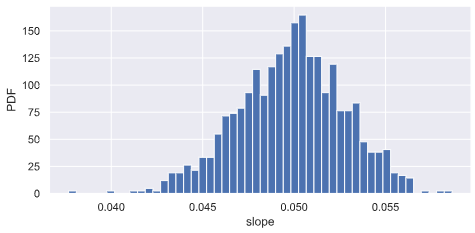

<p> 

Plotting bootstrap regressions: 

A nice way to visualize the variability we might expect in a linear regression is to plot the line you would get from each bootstrap replicate of the slope and intercept. Do this for the first 100 of your bootstrap replicates of the slope and intercept (stored as bs_slope_reps and bs_intercept_reps).

</p>

<p> 

- Generate an array of x values consisting of 0 and 100 for the plot of the regression lines. Use the np.array() function for this.
- Write a for loop in which you plot a regression line with a slope and intercept given by the pairs bootstrap replicates. Do this for 100 lines.
    - When plotting the regression lines in each iteration of the for loop, recall the regression equation y = a*x + b. Here, a is bs_slope_reps[i] and b is bs_intercept_reps[i].
    - Specify the keyword arguments linewidth=0.5, alpha=0.2, and color='red' in your call to plt.plot().
- Make a scatter plot with illiteracy on the x-axis and fertility on the y-axis. Remember to specify the marker='.' and linestyle='none' keyword arguments.
- Label the axes, set a 2% margin, and show the plot. This has been done for you, so hit submit to visualize the bootstrap regressions!

</p>

In [ ]:
# Generate array of x-values for bootstrap lines: x
x = np.array([0, 100])

# Plot the bootstrap lines
for i in range(100):
    _ = plt.plot(x, 
                 bs_slope_reps[i]*x + bs_intercept_reps[i],
                 linewidth=0.5, alpha=0.2, color='red')

# Plot the data
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')

# Label axes, set the margins, and show the plot
_ = plt.xlabel('illiteracy')
_ = plt.ylabel('fertility')
plt.margins(0.02)
plt.show()

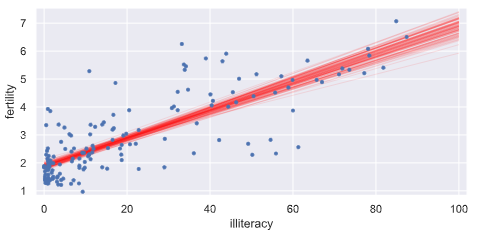